In [128]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster
import alphalens
%matplotlib inline

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
DATA_DIR = 'D:/Data/index/'

In [3]:
fname = '%s/881001.WI.xlsx'%(DATA_DIR)
df = pd.read_excel(fname)

In [5]:
files = [f for f in os.listdir(DATA_DIR) if f.startswith('CI')]

In [6]:
dic = {}
for f in files:
    fname = '%s/%s'%(DATA_DIR, f)
    temp = pd.read_excel(fname)
    dic[f.rstrip('.xlsx')] = temp['close']
idf = pd.DataFrame(dic)

In [8]:
idf = idf.dropna()

In [431]:
ret_df = idf.resample('M').last().pct_change()

In [432]:
rret_df = ret_df.subtract(df['close'].resample('M').last().pct_change(), axis='index')

In [433]:
rret_df = rret_df.dropna()

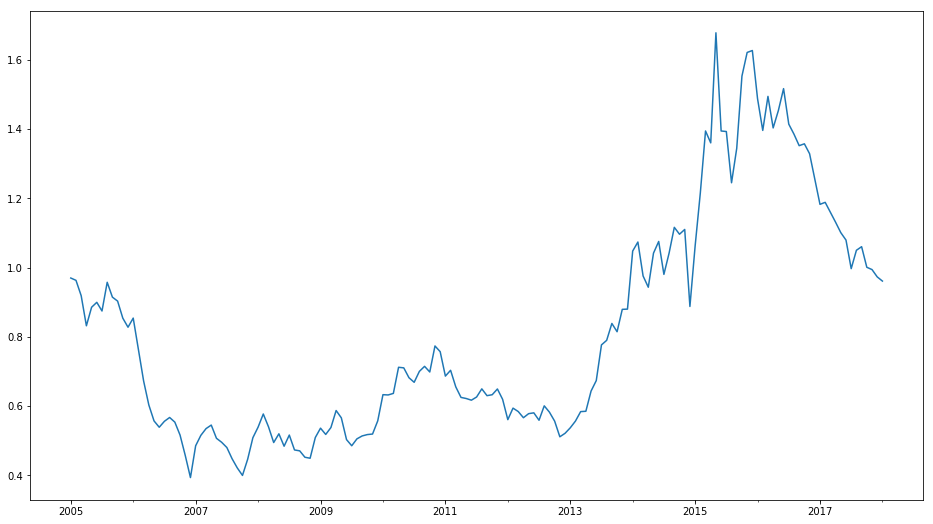

In [434]:
plt.figure(figsize=(16, 9))
(1+rret_df['CI005027.WI']).cumprod().plot()

In [435]:
def transition_matrix(labels, n):
    M = [[0]*n for _ in range(n)]
    for (i,j) in zip(labels, labels[1:]):
        M[i][j] += 1
    for row in M:
        m = sum(row)
        if m > 0:
            row[:] = [x*1./m for x in row]
    Mdf = pd.DataFrame(M, index=range(n), columns=range(n))
    return Mdf

In [436]:
rret_df.shape

(157, 29)

# 对收益率百分位进行聚类

In [437]:
affprop = sklearn.cluster.AffinityPropagation()
affprop.fit(rret_df.rank(pct=True, axis=1))

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [438]:
# K = 10
# kmeans = sklearn.cluster.KMeans(n_clusters=K)
# kmeans.fit(rret_df)

In [439]:
# pd.DataFrame(kmeans.cluster_centers_, columns=rret_df.columns).to_excel('C:/Users/zhangyang01/Desktop/temp2.xlsx')

In [440]:
# kmeans.labels_

In [441]:
affprop.labels_

array([ 1,  0, 14, 14, 12, 11,  1,  7,  0, 15,  1,  0,  5, 14,  0,  0,  7,
        8, 12, 15, 15,  3,  1,  1,  7,  2,  2,  2,  9,  5, 10, 10,  3,  1,
       13, 13, 13,  7, 16, 14, 13, 11, 13,  8,  3, 15,  2, 12,  4,  7,  4,
        5, 10,  1,  3, 13,  5,  4,  7,  5, 13, 13,  5,  6,  7, 16,  9,  7,
        6, 10, 13, 10,  8, 13, 14, 14, 15,  9,  7, 11,  3, 11,  6,  1, 10,
       13, 11,  9, 16, 11, 11, 12,  0,  8, 10, 10, 12, 13, 12,  5, 12, 11,
       12,  4, 12,  8, 13, 16, 12,  6,  8, 16, 13, 12, 10, 13, 13,  8, 10,
       10, 13, 12, 13,  8, 13, 14, 15, 14, 11, 13, 13, 16, 14, 14, 13, 14,
        5, 13, 14, 10,  8,  3,  8, 14, 10,  2, 16, 14,  1,  9, 10,  6, 13,
       16,  1, 16,  1], dtype=int64)

# 计算转移概率矩阵

In [442]:
# tran = transition_matrix(kmeans.labels_, K)

In [443]:
tran = transition_matrix(affprop.labels_, affprop.labels_.max()+1)

In [444]:
tran

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000
1,0.200000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.200000,0.000000,0.100000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000
2,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000
3,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.000000,0.250000,0.000000,0.125000,0.250000,0.125000,0.000000,0.000000
6,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000
7,0.111111,0.000000,0.111111,0.000000,0.111111,0.111111,0.111111,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.222222
8,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.100000,0.300000,0.100000,0.000000,0.100000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.400000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000


# 计算下期预期收益

In [445]:
# label = kmeans.labels_[-1]
label = affprop.labels_[-1]

In [446]:
prob = tran.loc[label].values

In [447]:
# pred = kmeans.cluster_centers_.T.dot(prob)
pred = affprop.cluster_centers_.T.dot(prob)

In [448]:
pd.Series(pred, index=rret_df.columns).sort_values(ascending=False)

CI005003.WI    0.706897
CI005008.WI    0.679310
CI005010.WI    0.655172
CI005014.WI    0.648276
CI005006.WI    0.637931
CI005022.WI    0.627586
CI005025.WI    0.620690
CI005015.WI    0.596552
CI005019.WI    0.589655
CI005012.WI    0.586207
CI005016.WI    0.562069
CI005023.WI    0.558621
CI005013.WI    0.555172
CI005002.WI    0.541379
CI005001.WI    0.534483
CI005018.WI    0.531034
CI005029.WI    0.531034
CI005020.WI    0.520690
CI005007.WI    0.510345
CI005011.WI    0.489655
CI005026.WI    0.451724
CI005005.WI    0.396552
CI005028.WI    0.389655
CI005024.WI    0.389655
CI005009.WI    0.375862
CI005017.WI    0.362069
CI005004.WI    0.358621
CI005021.WI    0.306897
CI005027.WI    0.286207
dtype: float64

# 滚动计算历史预测

In [551]:
# K = 10
W = 60
pred_df = pd.DataFrame(index=rret_df.index, columns=rret_df.columns)
for i, date in enumerate(rret_df.index):
    past_return = rret_df[rret_df.index <= date][-W:]
    if past_return.shape[0] >= W:
        past_return = past_return.rank(pct=True, axis=1)
#         kmeans = sklearn.cluster.KMeans(n_clusters=K)
#         kmeans.fit(past_return)
        affprop = sklearn.cluster.AffinityPropagation()
        affprop.fit(past_return)
        label = affprop.labels_[-1]
        tran = transition_matrix(affprop.labels_, affprop.labels_.max()+1)
        prob = tran.loc[label].values
        pred = affprop.cluster_centers_.T.dot(prob)
        pred_df.loc[date] = pred

In [552]:
# plt.figure(figsize=(16, 9))
# plt.scatter(pred_df['CI005021.WI'], rret_df['CI005021.WI'].shift(-1))

In [553]:
pred_df.tail()

,CI005001.WI,CI005002.WI,CI005003.WI,CI005004.WI,CI005005.WI,CI005006.WI,CI005007.WI,CI005008.WI,CI005009.WI,CI005010.WI,...,CI005020.WI,CI005021.WI,CI005022.WI,CI005023.WI,CI005024.WI,CI005025.WI,CI005026.WI,CI005027.WI,CI005028.WI,CI005029.WI
2017-09-30,0.737931,0.841379,0.572414,0.641379,0.806897,0.344828,0.689655,0.551724,0.372414,0.289655,...,0.427586,0.910345,0.731034,0.57931,0.572414,0.365517,0.131034,0.103448,0.103448,0.324138
2017-10-31,0.344828,0.4,0.427586,0.4,0.317241,0.62069,0.344828,0.57931,0.641379,0.606897,...,0.427586,0.255172,0.413793,0.448276,0.324138,0.724138,0.758621,0.668966,0.393103,0.462069
2017-11-30,0.375479,0.467433,0.455939,0.429119,0.494253,0.662835,0.375479,0.704981,0.67433,0.590038,...,0.67433,0.467433,0.35249,0.555556,0.498084,0.655172,0.528736,0.471264,0.340996,0.521073
2017-12-31,0.408867,0.359606,0.536946,0.477833,0.300493,0.551724,0.438424,0.403941,0.600985,0.492611,...,0.320197,0.35468,0.472906,0.576355,0.344828,0.576355,0.714286,0.630542,0.46798,0.605911
2018-01-31,0.418103,0.474138,0.439655,0.469828,0.439655,0.599138,0.443966,0.594828,0.62931,0.547414,...,0.603448,0.448276,0.340517,0.530172,0.49569,0.607759,0.543103,0.478448,0.258621,0.465517


In [554]:
pred_df.iloc[-1].sort_values(ascending=False)

CI005019.WI    0.659483
CI005009.WI     0.62931
CI005017.WI    0.616379
CI005025.WI    0.607759
CI005015.WI    0.603448
CI005020.WI    0.603448
CI005006.WI    0.599138
CI005008.WI    0.594828
CI005018.WI    0.577586
CI005012.WI    0.573276
CI005013.WI    0.564655
CI005010.WI    0.547414
CI005026.WI    0.543103
CI005016.WI    0.543103
CI005023.WI    0.530172
CI005014.WI    0.521552
CI005011.WI    0.512931
CI005024.WI     0.49569
CI005027.WI    0.478448
CI005002.WI    0.474138
CI005004.WI    0.469828
CI005029.WI    0.465517
CI005021.WI    0.448276
CI005007.WI    0.443966
CI005005.WI    0.439655
CI005003.WI    0.439655
CI005001.WI    0.418103
CI005022.WI    0.340517
CI005028.WI    0.258621
Name: 2018-01-31 00:00:00, dtype: object

# 验证因子

In [555]:
pred_df = pred_df.dropna()
pricing = idf[idf.index >= pred_df.index[0]].resample('M').last()

In [556]:
factor_df = pred_df.stack()
factor_df.index = factor_df.index.set_names(['date', 'asset'])

In [595]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor_df, pricing, quantiles=5, periods=(1,2,3))

Dropped 3.1% entries from factor data (3.1% after in forward returns computation and 0.0% in binning phase). Set max_loss=0 to see potentially suppressed Exceptions.


In [596]:
factor_data.head()

1         2         3    factor  \
date       asset                                                 
2009-12-31 CI005001.WI -0.085843 -0.061246 -0.043570  0.363985   
           CI005002.WI -0.164913 -0.155105 -0.128434  0.559387   
           CI005003.WI -0.138576 -0.118718 -0.097909  0.750958   
           CI005004.WI -0.052817 -0.004012  0.009713  0.455939   
           CI005005.WI -0.153171 -0.127838 -0.135772   0.43295   

                        factor_quantile  
date       asset                         
2009-12-31 CI005001.WI                1  
           CI005002.WI                4  
           CI005003.WI                5  
           CI005004.WI                2  
           CI005005.WI                1

In [597]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_group=False)

In [585]:
mean_return_by_q.head()

,1,2,3
factor_quantile,,,
1,-0.001798,-0.002731,-0.005617
2,0.002131,-0.000152,-0.002696
3,-0.001858,0.000412,0.000950
4,-0.000408,-0.001584,0.001234
5,0.001784,0.004195,0.006522


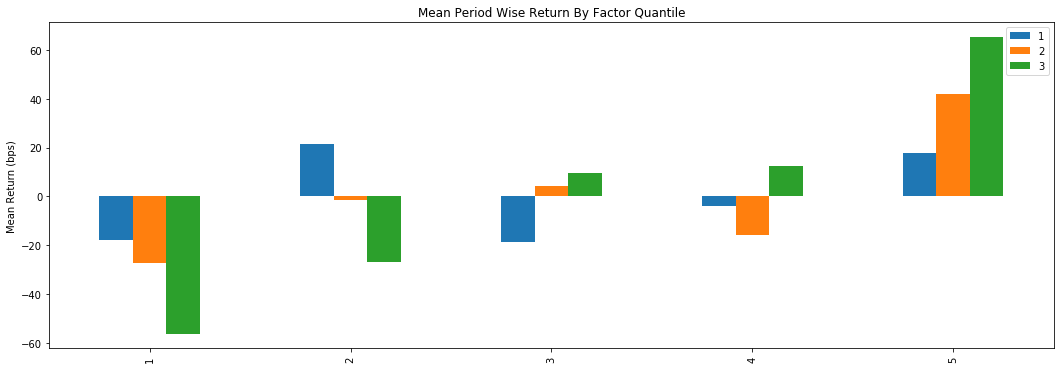

In [592]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q)

In [587]:
mean_return_by_q_daily, std_err = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True)

In [588]:
mean_return_by_q_daily.head()

1         2         3
factor_quantile date                                    
1               2009-12-31  0.012747  0.006678 -0.013121
                2010-01-31 -0.006954 -0.019555 -0.026607
                2010-02-28 -0.009217 -0.015092 -0.024271
                2010-03-31  0.003344 -0.008719  0.007928
                2010-04-30 -0.018989 -0.015837 -0.031596

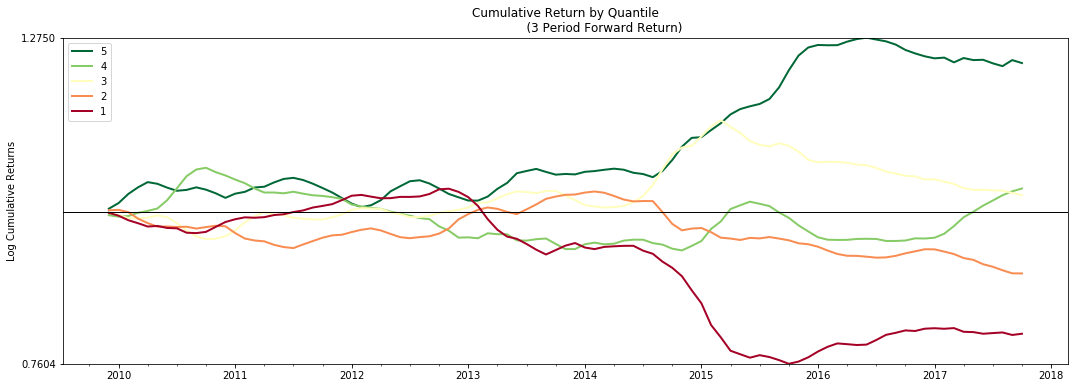

In [590]:
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q_daily, period=3)

In [579]:
ls_factor_returns = alphalens.performance.factor_returns(factor_data)

In [580]:
ls_factor_returns.head()

,1,2,3,4
date,,,,
2009-12-31,-0.008603,-0.011873,0.003942,0.011810
2010-01-31,0.001124,0.019097,0.032375,0.043718
2010-02-28,0.017649,0.033506,0.046978,0.034337
2010-03-31,0.013151,0.027120,0.010707,0.018737
2010-04-30,0.017594,0.014659,0.015656,0.040787


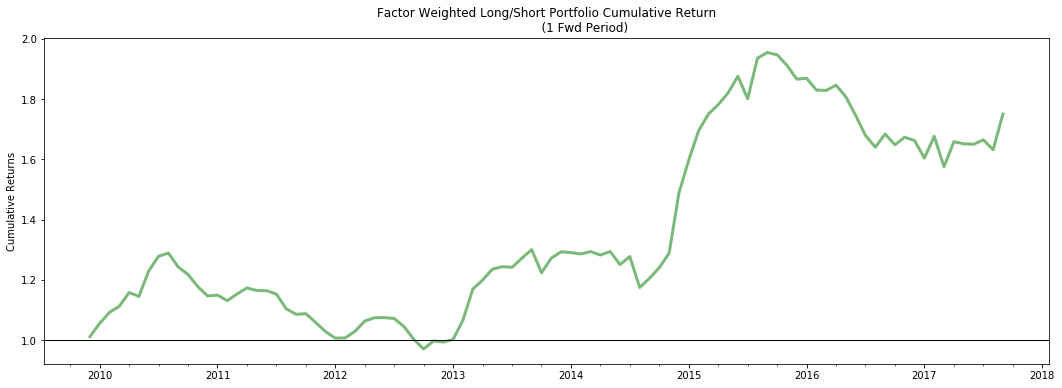

In [581]:
alphalens.plotting.plot_cumulative_returns(ls_factor_returns[4]);

In [511]:
alpha_beta = alphalens.performance.factor_alpha_beta(factor_data)

In [512]:
alpha_beta

,1,2,3,6
Ann. alpha,0.303619,0.287796,0.361730,0.246459
beta,-0.001147,0.026171,0.061998,0.060148


Returns Analysis


,1,2,3
Ann. alpha,0.326,0.336,0.340
beta,0.000,0.025,0.062
Mean Period Wise Return Top Quantile (bps),17.840,20.952,21.692
Mean Period Wise Return Bottom Quantile (bps),-17.977,-13.665,-18.758
Mean Period Wise Spread (bps),37.728,37.474,42.611


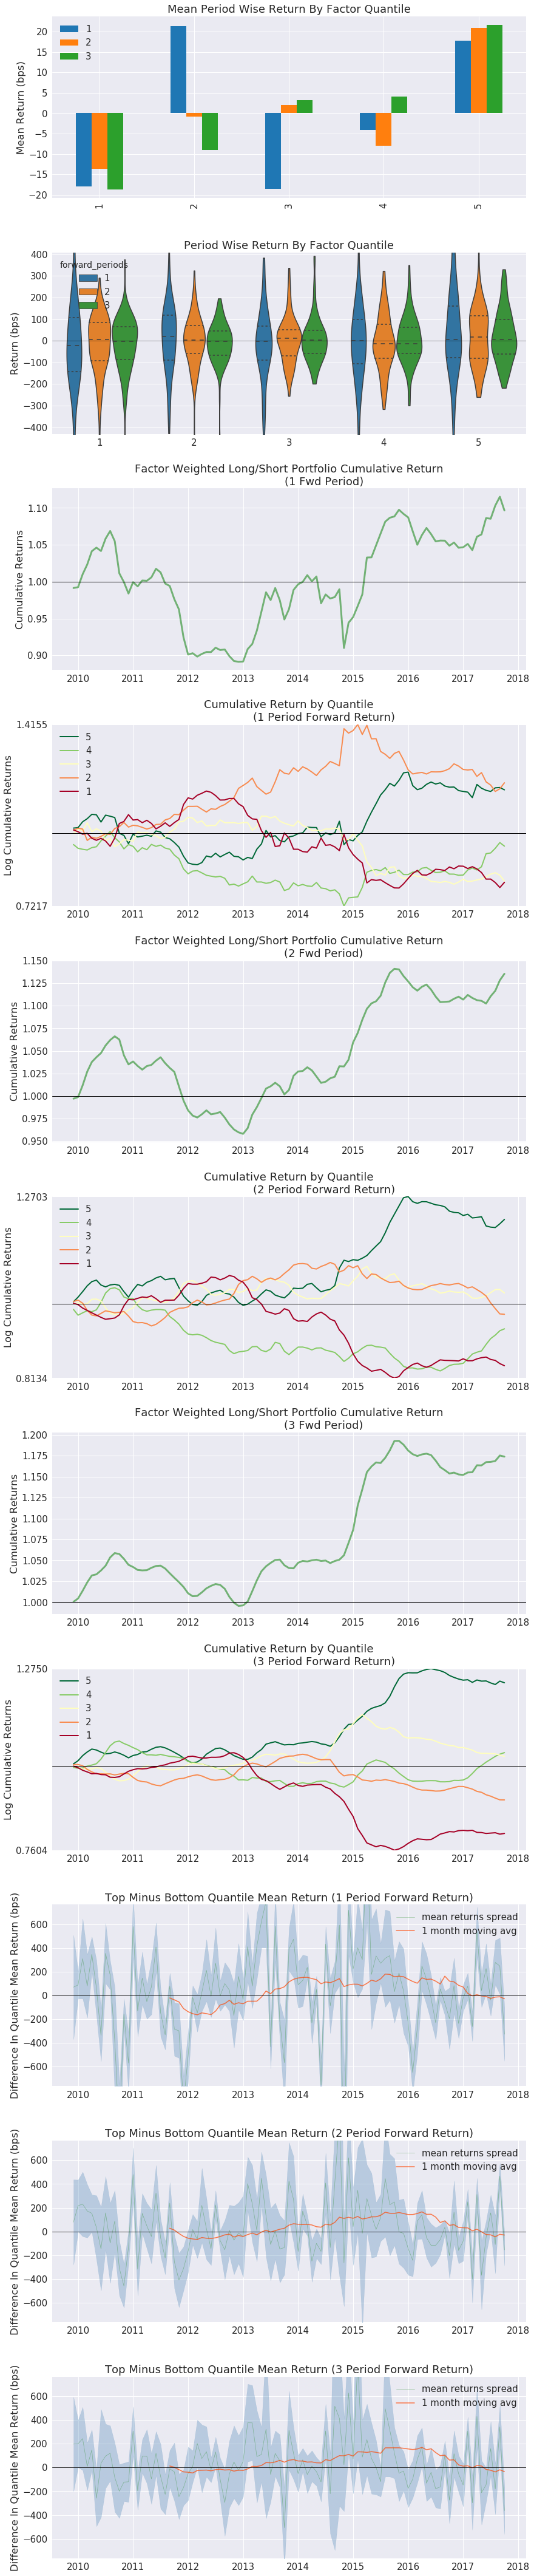

In [591]:
alphalens.tears.create_returns_tear_sheet(factor_data)